## Problem Statement-  Mall want its given customer to be segmented so that it can identify potential customer and target those customer with special offers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch



### Importing data 

In [2]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Checking for null values

In [3]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Checking data  info

In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## EDA 

In [7]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

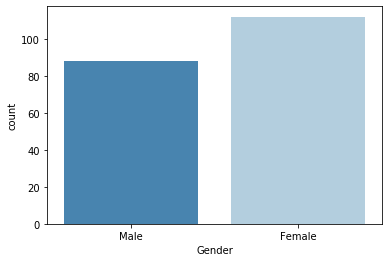

In [8]:
sns.countplot(data['Gender'], palette='Blues_r')

#### From above count we know demographics of customer based on gender of all 200,  44% are Male and 66% are female, Female customers are more

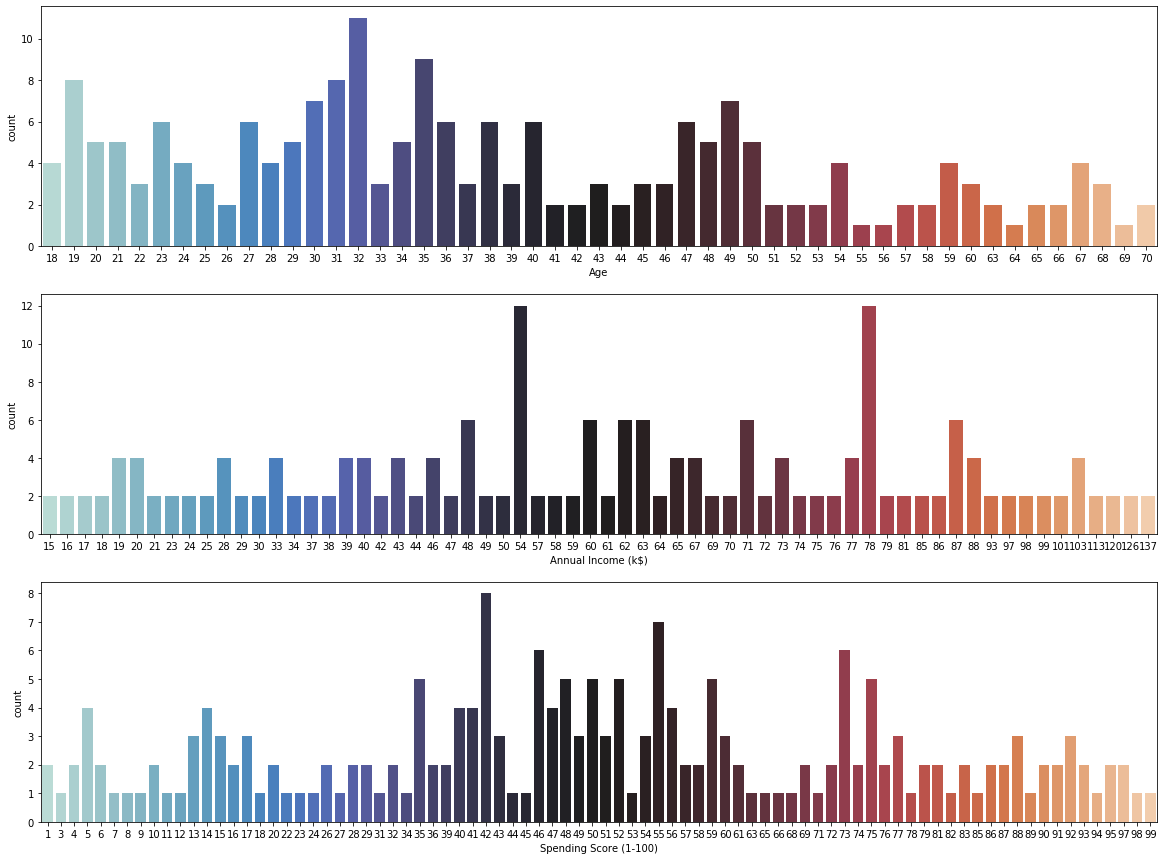

In [9]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.countplot(data['Age'], palette='icefire')
plt.subplot(3,1,2)
sns.countplot(data['Annual Income (k$)'], palette='icefire')
plt.subplot(3,1,3)
sns.countplot(data['Spending Score (1-100)'], palette='icefire')

#### From inspecting all above charts we can tell there are customer from age of 40-70 that have higher annual income, and we can see same having higher spending score, below distribution plot verify our analysis

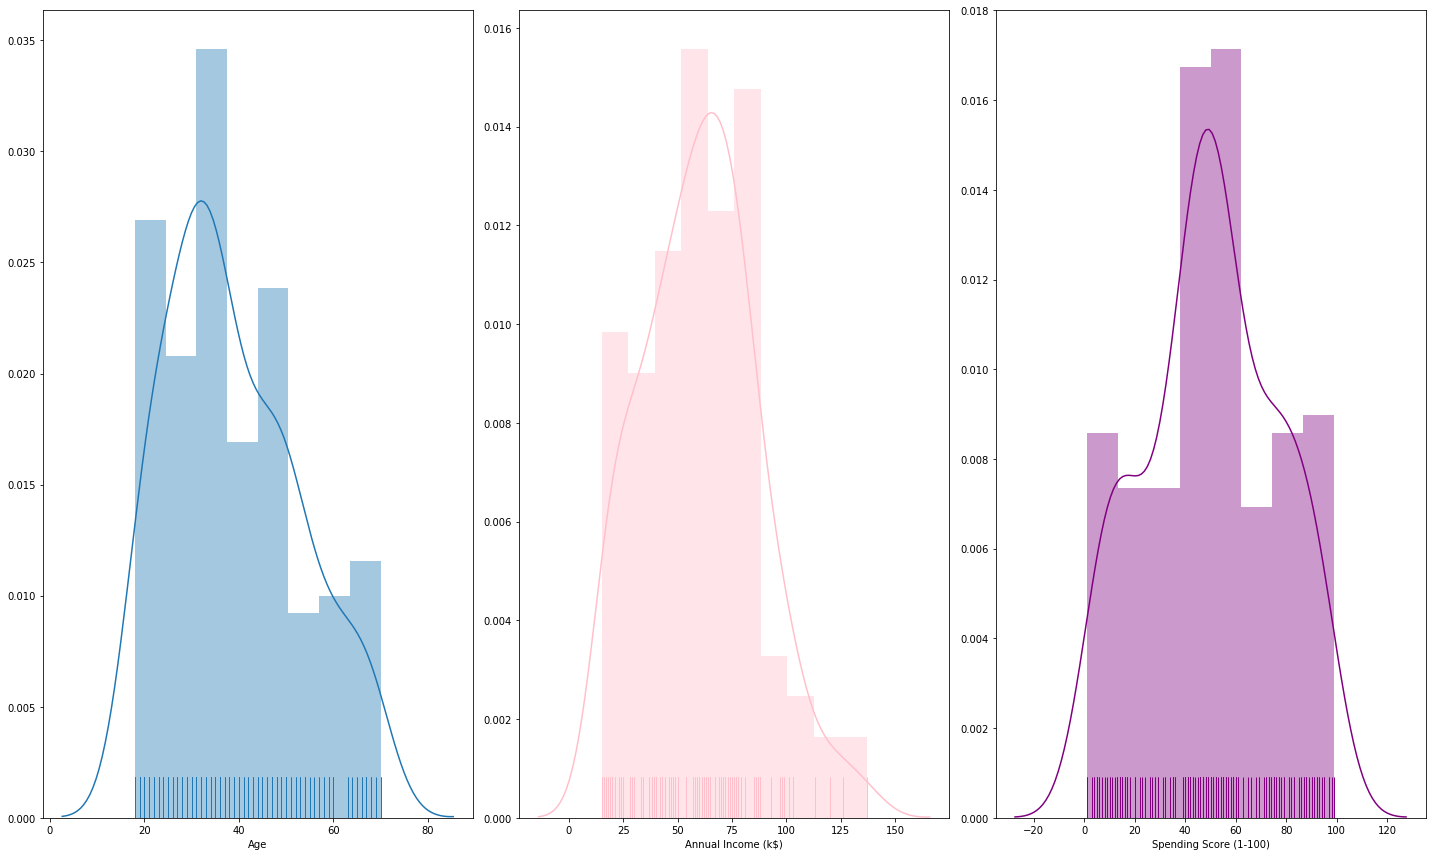

In [10]:
plt.figure(figsize=(20,12))
plt.subplot(1,3,1)
sns.distplot(data['Age'], kde=True, rug=True)

plt.subplot(1,3,2)
sns.distplot(data['Annual Income (k$)'],kde=True, rug=True, color='Pink')
plt.tight_layout()

plt.subplot(1,3,3)
sns.distplot(data['Spending Score (1-100)'],kde=True, rug=True, color='Purple')
plt.tight_layout()

#### Checking for correlation between feature

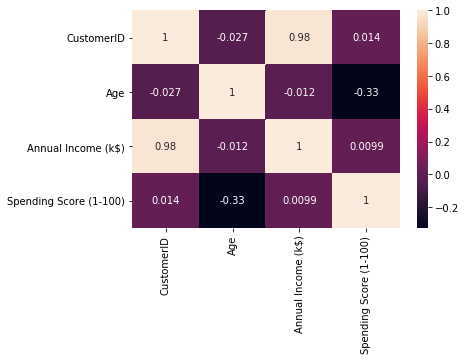

In [11]:
sns.heatmap(data.corr(), annot=True, color='Blue')

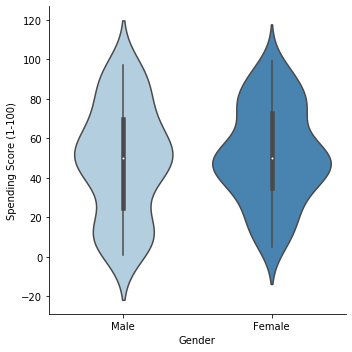

In [12]:
sns.catplot('Gender', 'Spending Score (1-100)', data=data, kind='violin',palette = 'Blues')


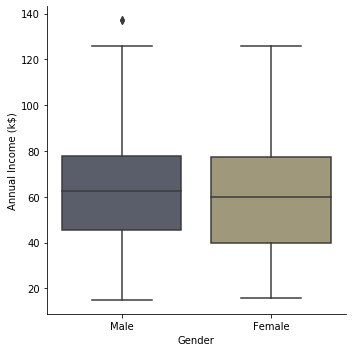

In [13]:
sns.catplot('Gender', 'Annual Income (k$)',data=data, palette = 'cividis',kind='box')

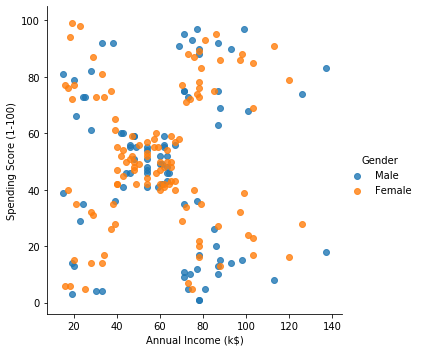

In [14]:
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)',hue='Gender', data=data, fit_reg=False)

#### Annual income and spending score shows  grouping in chart which show high possibility to group and segment customer based on there annual income and spending pattern

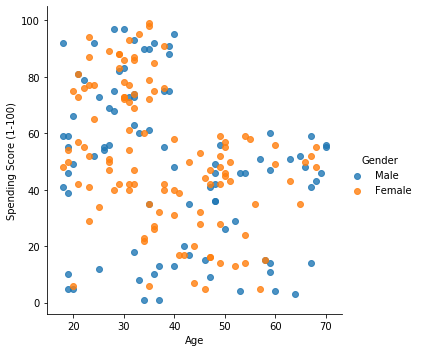

In [15]:
sns.lmplot(x='Age', y='Spending Score (1-100)',hue='Gender', data=data, fit_reg=False)

#### Customer with age group upto 40 have higher spending score  means they are frequent shopper that go with trends and shop with low to average annual income if we see insight from annual income distribution and age -annual income relationship  below.

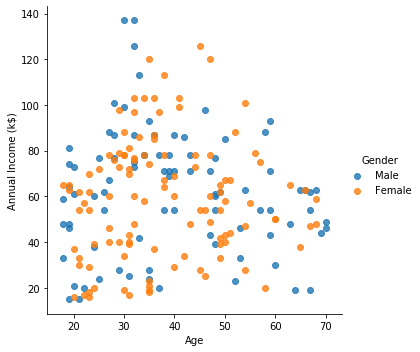

In [16]:
sns.lmplot(x='Age', y='Annual Income (k$)',hue='Gender', data=data, fit_reg=False)

### Creating dummies for categorical feature

In [17]:
df=pd.get_dummies(data, drop_first=True)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [18]:
df.drop('CustomerID',inplace=True, axis=1)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [19]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male'], dtype='object')

### Performing scaling of features

In [20]:
scaler=StandardScaler()
dfscaled=scaler.fit_transform(df)
dfscaled=pd.DataFrame(dfscaled)
dfscaled.columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']
dfscaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


### Clustering on age and spending score

### K-Means Clustering Algorithm to determine various segment of customer based on age and  spending score

In [21]:
kdata=dfscaled[['Age','Spending Score (1-100)']]
kdata.head()

,Age,Spending Score (1-100)
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980


#### Initially we assume there are four cluster at random


In [22]:
kmeans=KMeans(n_clusters=4,max_iter=50)

In [23]:
kmeans.fit(kdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Plotting sum of square distance to get elbow curve , so that we can get optimal cluster where changing cluster count doesnt make any huge significant improvement

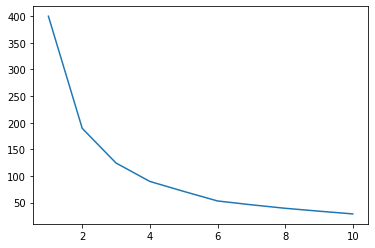

In [25]:
kssd=[]
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(kdata)
    kssd.append(km.inertia_)
plt.plot(range(1, 11), kssd)



#### Plotting cluster and identifying labels based on spending score and age

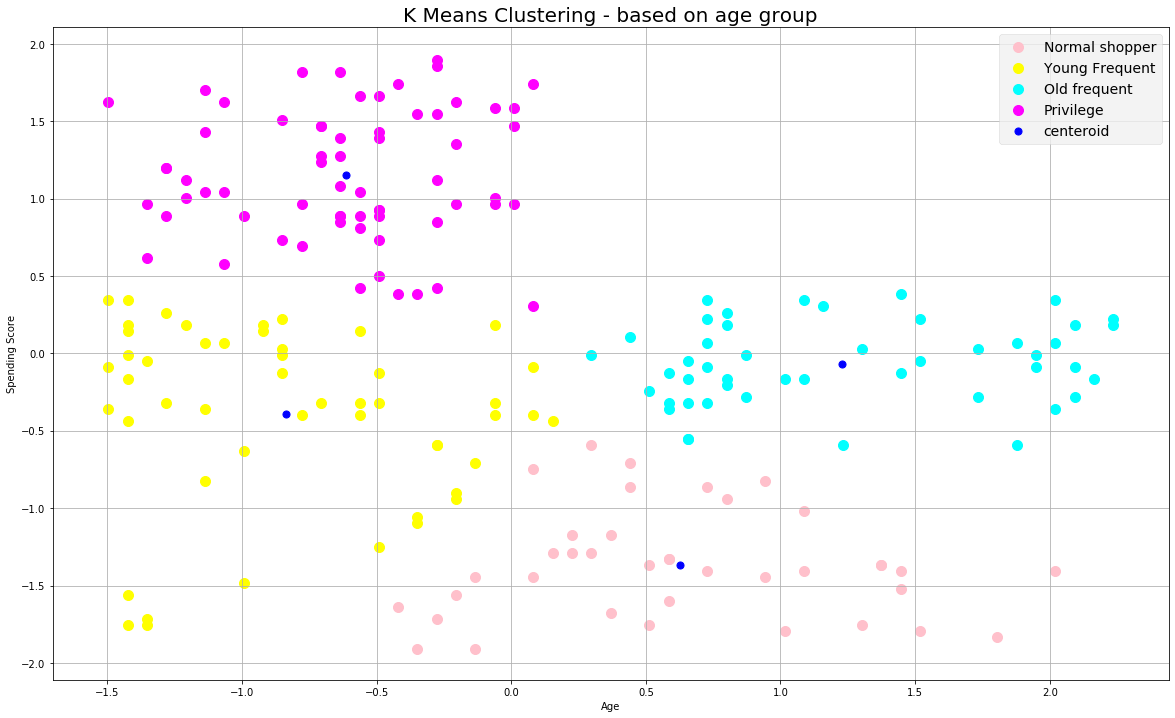

In [26]:
plt.figure(figsize=(20,12))
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(kdata)
kdata = np.array(kdata)
plt.scatter(kdata[y_means == 0, 0], kdata[y_means == 0, 1], s = 100, c = 'pink', label = 'Normal shopper')
plt.scatter(kdata[y_means == 1, 0], kdata[y_means == 1, 1], s = 100, c = 'yellow', label = 'Young Frequent')
plt.scatter(kdata[y_means == 2, 0], kdata[y_means == 2, 1], s = 100, c = 'cyan', label = 'Old frequent')
plt.scatter(kdata[y_means == 3, 0], kdata[y_means == 3, 1], s = 100, c = 'magenta', label = 'Privilege')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering - based on age group', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()


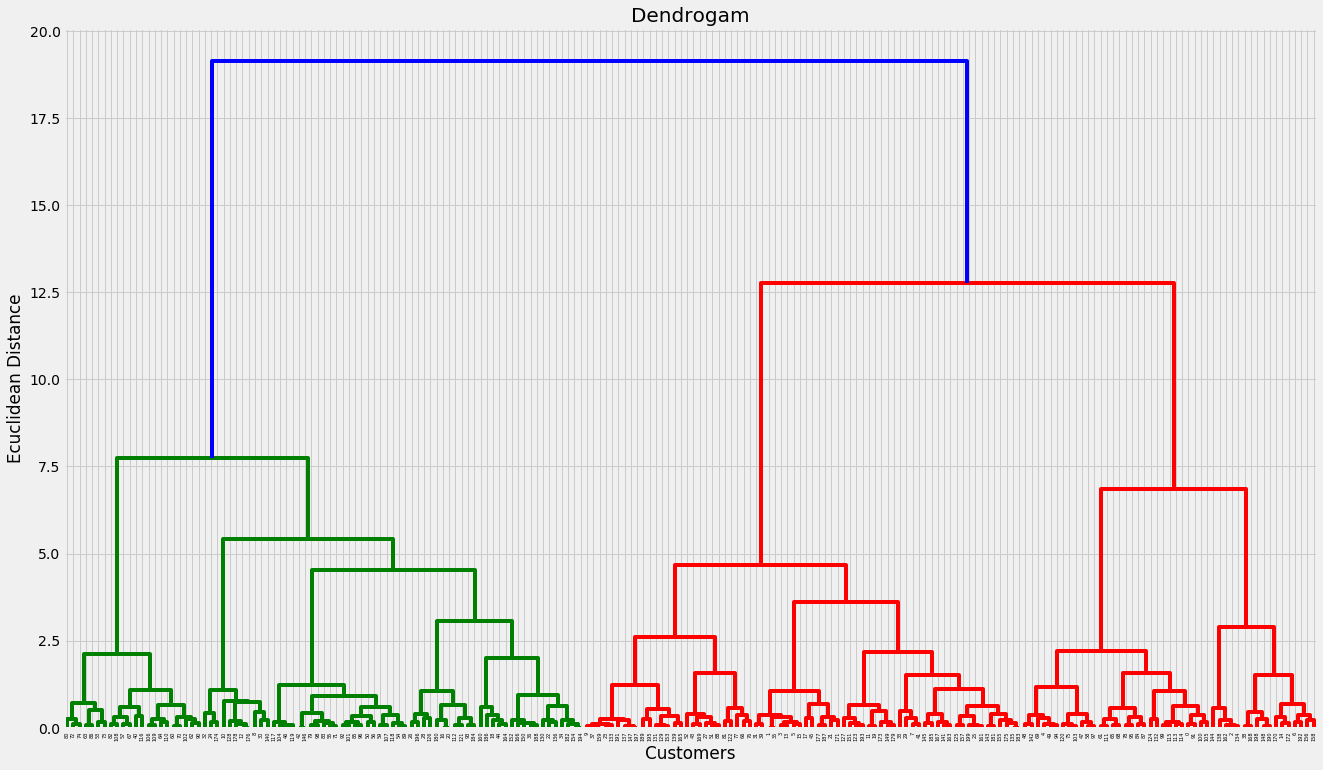

In [27]:

plt.figure(figsize=(20,12))
dendrogram = sch.dendrogram(sch.linkage(kdata, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

### Determine various segment of customer based on annual income and  spending score i.e spending habits

In [28]:
kdata=dfscaled[['Annual Income (k$)','Spending Score (1-100)']]
kdata.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [29]:
kmeans=KMeans(n_clusters=4,max_iter=50)

In [30]:
kmeans.fit(kdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Plotting sum of square distance to get elbow curve , so that we can get optimal cluster where changing cluster count doesnt make any huge significant improvement

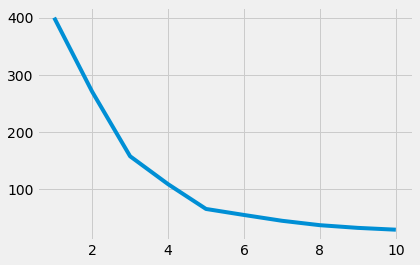

In [31]:
kssd=[]
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(kdata)
    kssd.append(km.inertia_)
plt.plot(range(1, 11), kssd)

#### According to  elbow chart 5 are optimal cluster to be  form


#### Plotting cluster and identifying labels based on annual income and  spending score

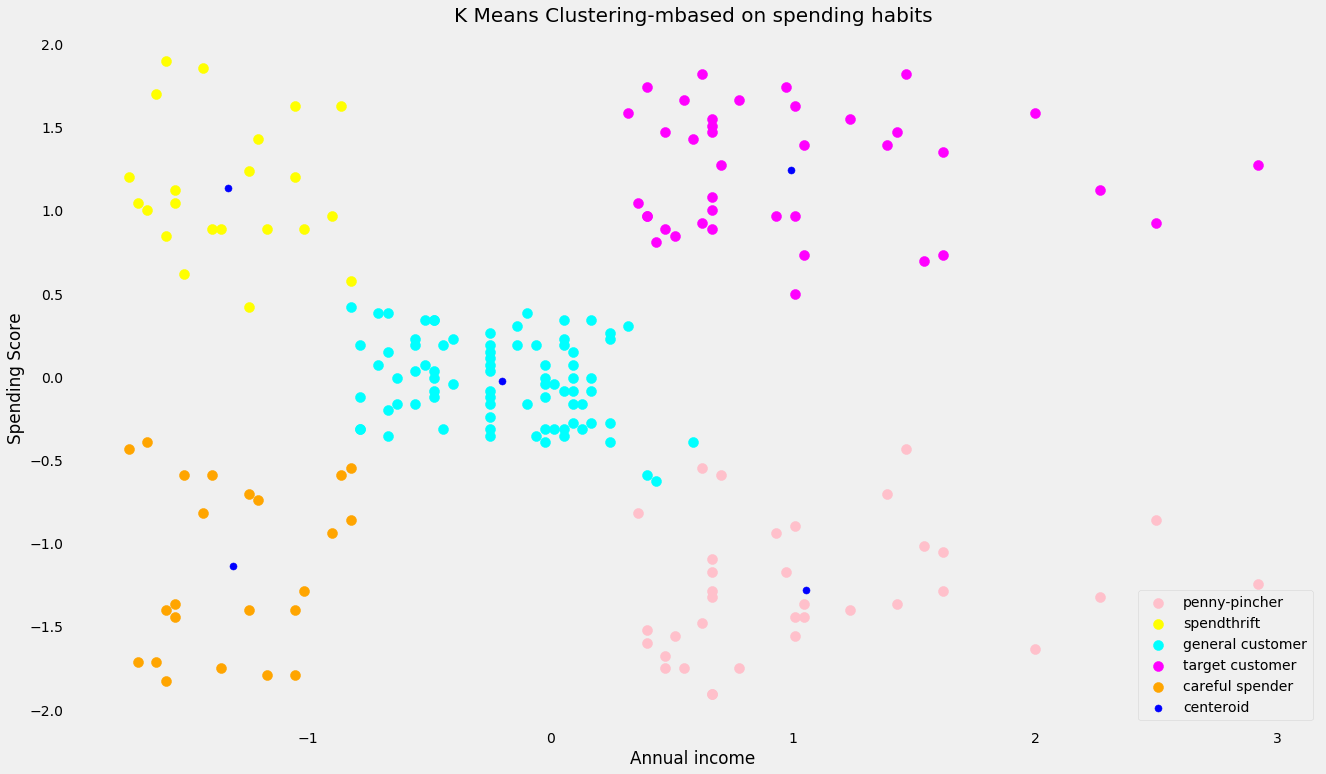

In [32]:
plt.figure(figsize=(20,12))
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(kdata)
kdata = np.array(kdata)
plt.scatter(kdata[y_means == 0, 0], kdata[y_means == 0, 1], s = 100, c = 'pink', label = 'penny-pincher')
plt.scatter(kdata[y_means == 1, 0], kdata[y_means == 1, 1], s = 100, c = 'yellow', label = 'spendthrift')
plt.scatter(kdata[y_means == 2, 0], kdata[y_means == 2, 1], s = 100, c = 'cyan', label = 'general customer')
plt.scatter(kdata[y_means == 3, 0], kdata[y_means == 3, 1], s = 100, c = 'magenta', label = 'target customer')
plt.scatter(kdata[y_means == 4, 0], kdata[y_means == 4, 1], s = 100, c = 'orange', label = 'careful spender')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering-mbased on spending habits', fontsize = 20)
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

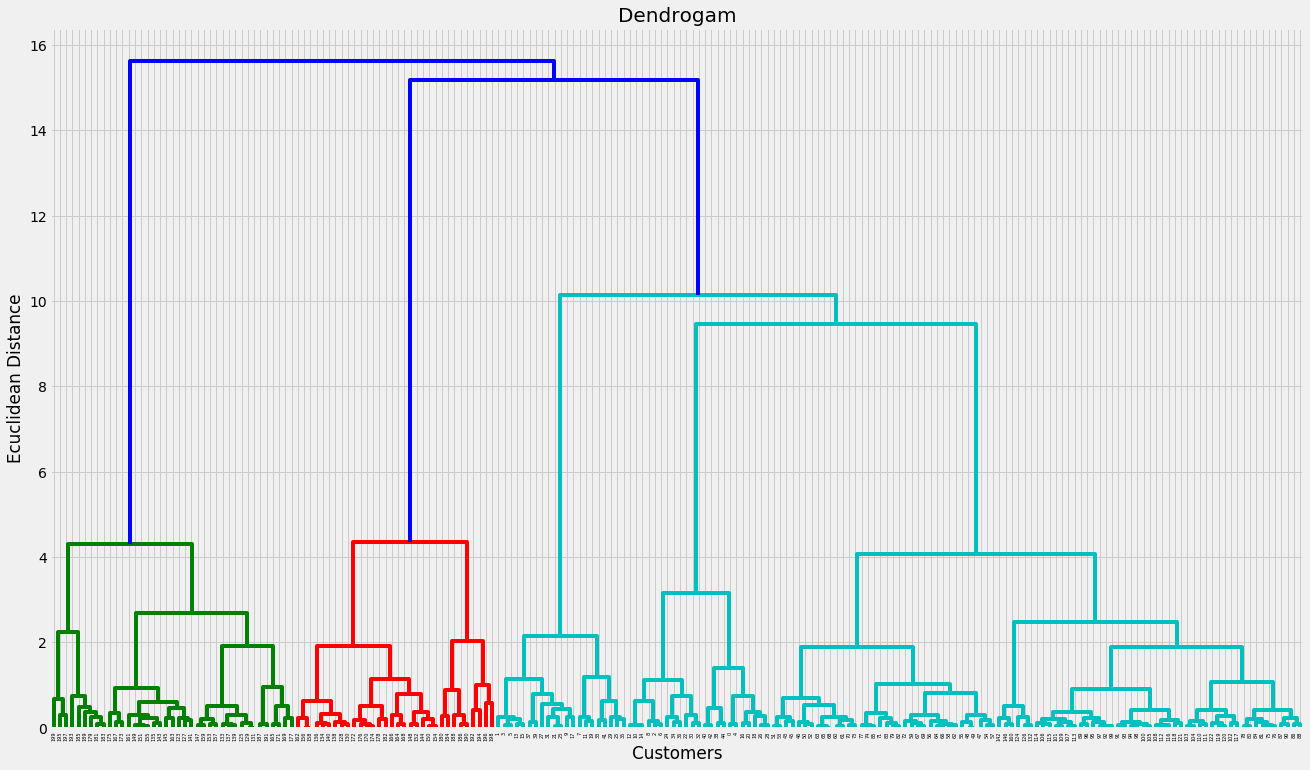

In [33]:

plt.figure(figsize=(20,12))
dendrogram = sch.dendrogram(sch.linkage(kdata, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()